In [1]:
import os
import glob
import geopandas as gpd
import contextily as ctx
from asp_plot.altimetry import Altimetry

In [2]:
directory = "/Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00"

dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m.tif"))[0]
try:
    aligned_dem_fn = glob.glob(os.path.join(directory, "stereo*/*DEM_1m*pc_align*.tif"))[0]
except:
    aligned_dem_fn = None

icesat_directory = os.path.join(directory, "icesat_data")
os.makedirs(icesat_directory, exist_ok=True)

plots_directory = os.path.join(directory, "asp_plots")
os.makedirs(plots_directory, exist_ok=True)

map_crs = "32604"

ctx_kwargs = {
    "crs": f"EPSG:{map_crs}",
    "source": ctx.providers.Esri.WorldImagery,
    "attribution_size": 0,
    "alpha": 0.5,
}

In [3]:
icesat = Altimetry(directory=directory, dem_fn=dem_fn, aligned_dem_fn=aligned_dem_fn)

In [4]:
icesat.request_atl06sr_multi_processing(
    save_to_parquet=True,
)

# icesat.request_atl06sr_multi_processing(
#     res=10,
#     len=20,
#     ats=20,
#     cnt=5,
#     maxi=5,
#     save_to_parquet=True,
#     processing_levels=["ground"],
# )


ICESat-2 ATL06 request processing for: ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground.parquet
Filtering ATL06-SR ground
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_ground_filtered.parquet

ICESat-2 ATL06 request processing for: canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy.parquet
Filtering ATL06-SR canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_canopy_filtered.parquet

ICESat-2 ATL06 request processing for: top_of_canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_top_of_canopy.parquet
Filtering ATL06-SR top_of_canopy
Existing file found, reading in: atl06sr_res20_len40_cnt10_ats20_maxi5_top_of_canopy_filtered.parquet


In [5]:
icesat.atl06sr_processing_levels["ground"].shape

(153595, 20)

In [6]:
icesat.atl06sr_processing_levels_filtered["ground"].shape

(131310, 20)

In [7]:
# Filter by ESA WorldCover
icesat.filter_esa_worldcover(filter_out="water")

In [8]:
icesat.atl06sr_processing_levels_filtered["ground"].shape

(37954, 20)

In [9]:
# User defined temporal filter
# icesat.generic_temporal_filter_atl06sr(
#     select_years=[2021, 2022, 2023],
#     select_months=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
#     select_days=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]
# )

In [10]:
# Predefined temporal filter
icesat.predefined_temporal_filter_atl06sr()


Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: ground

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: canopy

Filtering ATL06 with 15 day pad, 90 day pad, and seasonal pad around 2022-04-17 22:52:18.495475 for: top_of_canopy


In [11]:
icesat.atl06sr_processing_levels_filtered["ground_seasonal"].shape

(11324, 20)

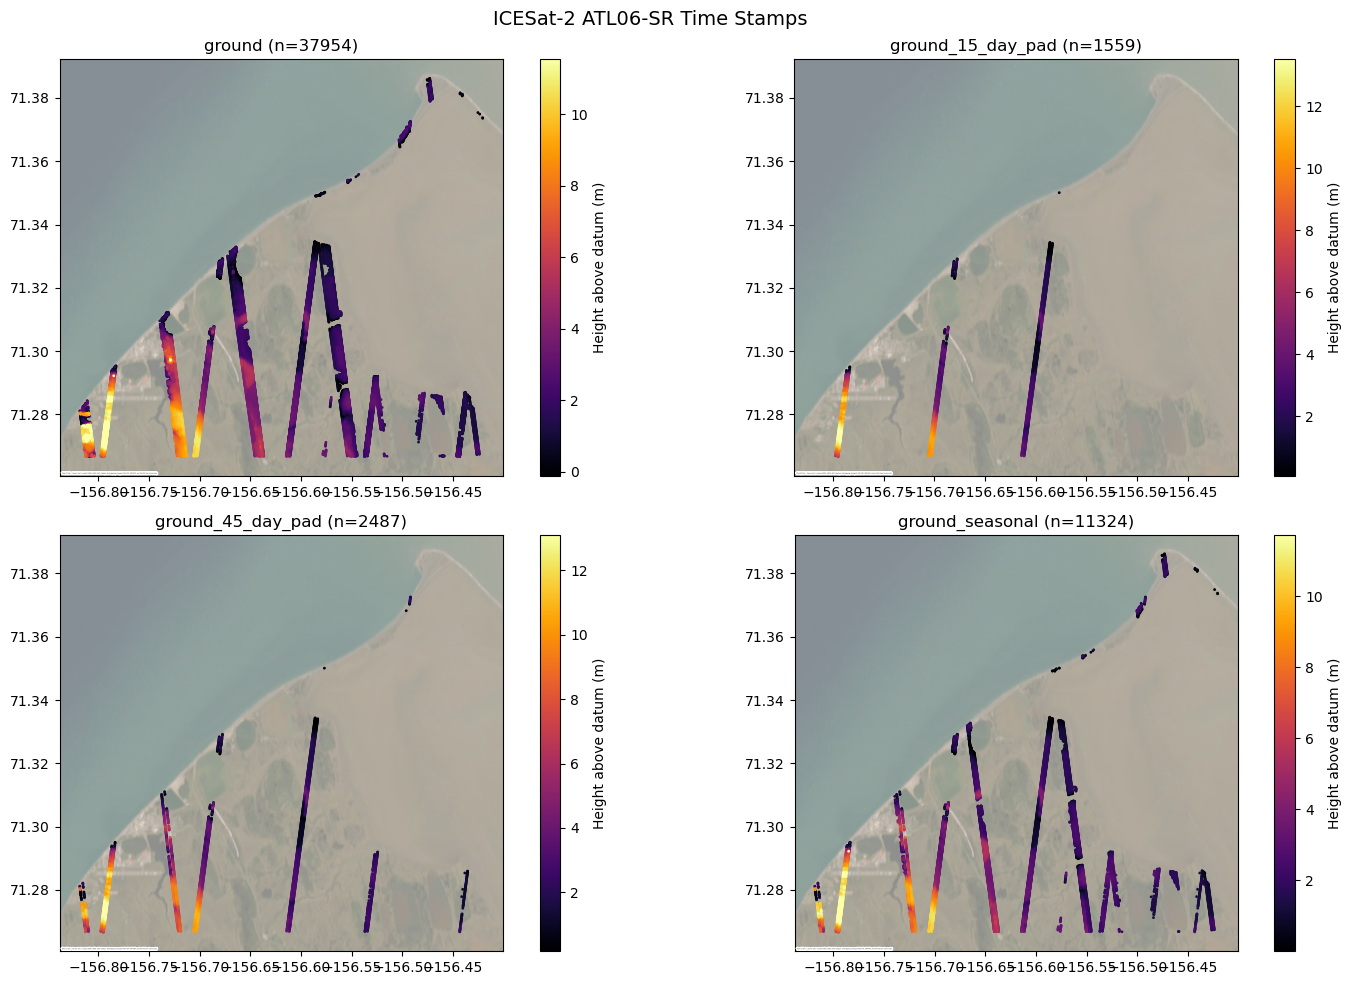

In [12]:
icesat.plot_atl06sr_time_stamps(
   key="ground",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

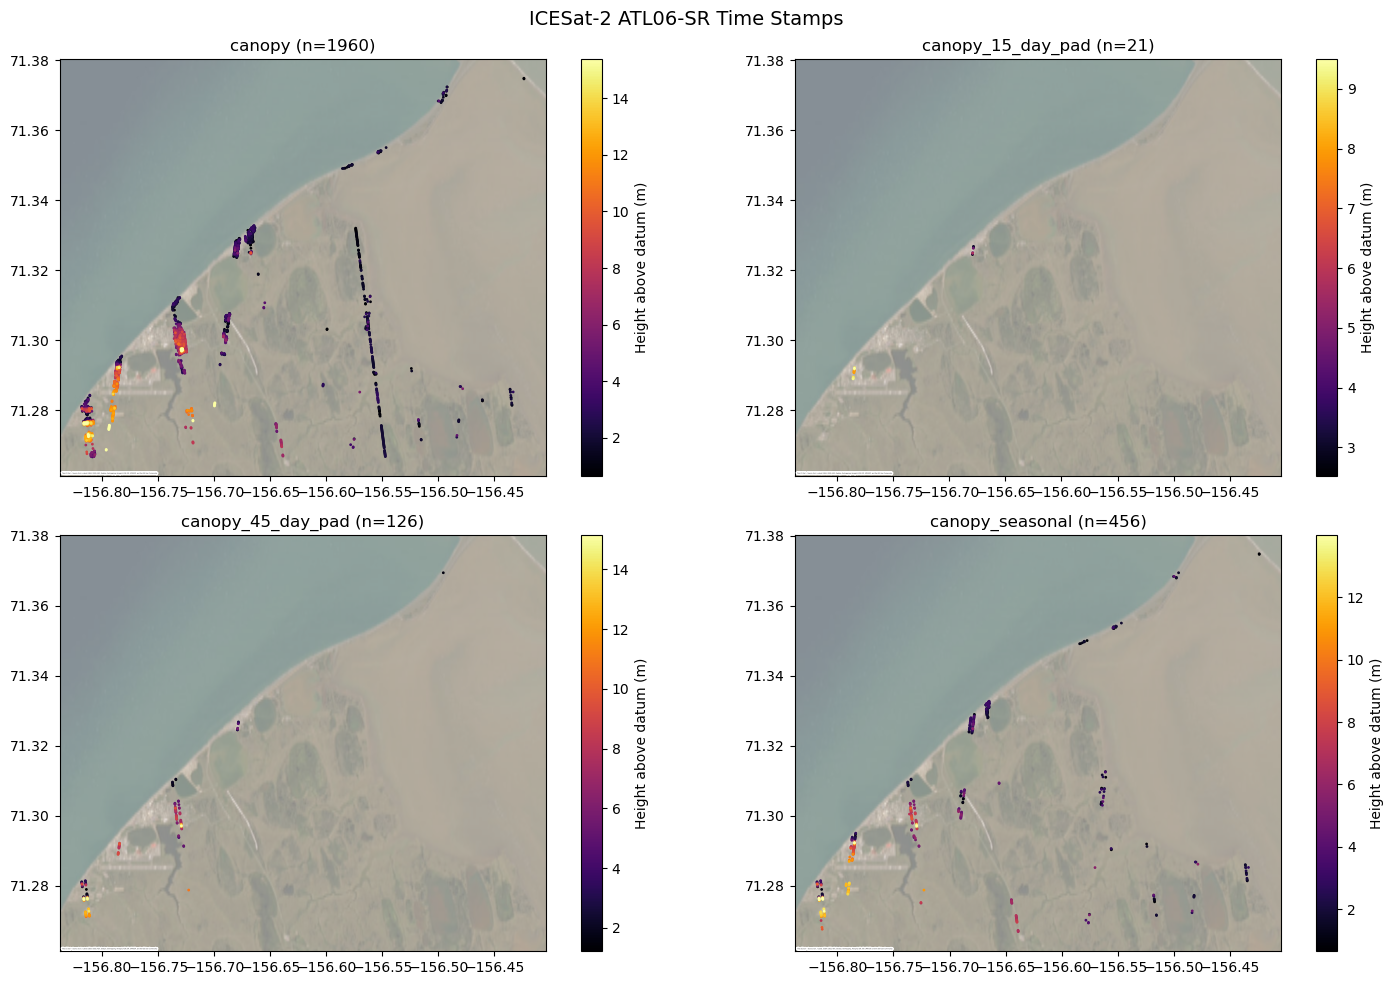

In [13]:
icesat.plot_atl06sr_time_stamps(
   key="canopy",
   figsize=(15, 10),
   save_dir=None,
   fig_fn=None,
   **ctx_kwargs,
)

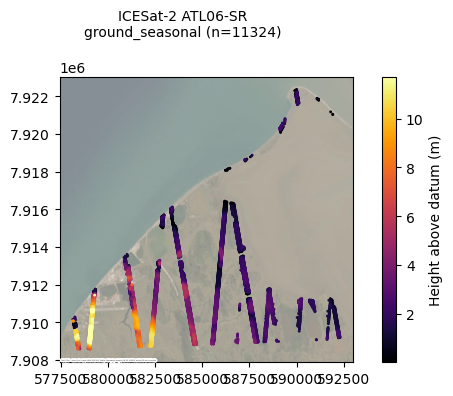

In [14]:
icesat.plot_atl06sr(
    key="ground_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    **ctx_kwargs
)

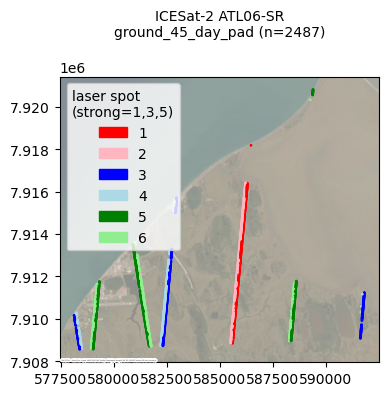

In [15]:
icesat.plot_atl06sr(
    key="ground_45_day_pad",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=False,
    plot_beams=True,
    **ctx_kwargs
)

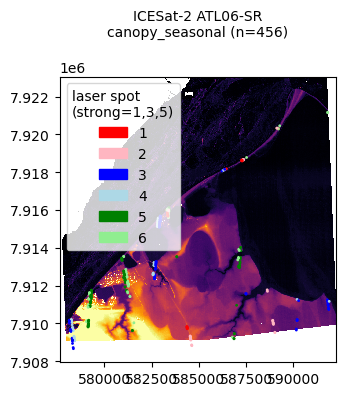

In [16]:
icesat.plot_atl06sr(
    key="canopy_seasonal",
    map_crs=map_crs,
    cmap="inferno",
    plot_dem=True,
    plot_beams=True,
    **ctx_kwargs
)


icesat_minus_dem not found in ATL06 dataframe: ground_15_day_pad. Running differencing first.



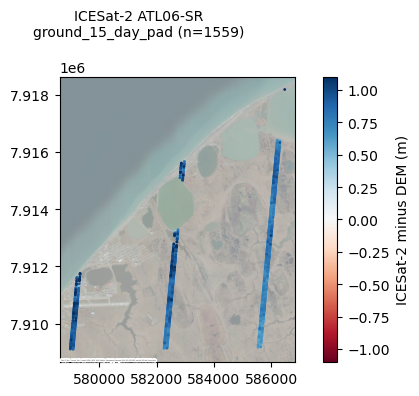

In [17]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    **ctx_kwargs,
)

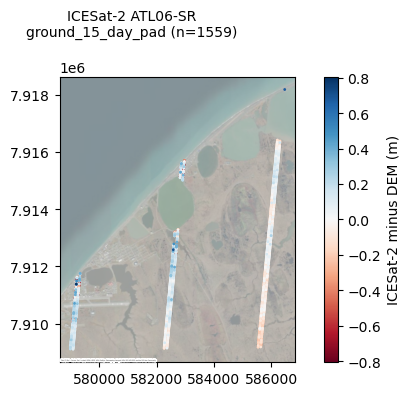

In [18]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)

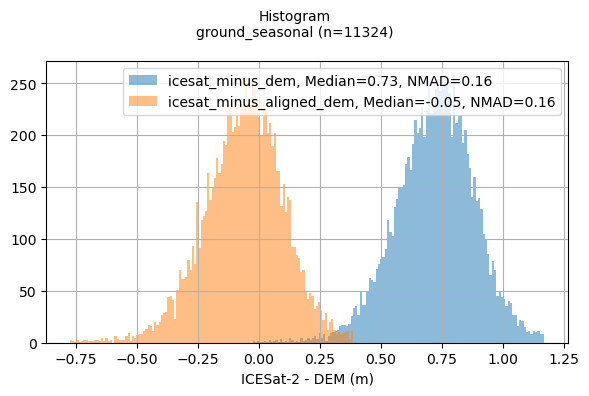

In [19]:
# Show a quick histogram
icesat.histogram(
    key="ground_seasonal",
    plot_aligned=True,
)

## WIP: PC Alignment Comparison

In [21]:
icesat.alignment_report(
    processing_level="ground",
    minimum_points=500,
    agreement_threshold=0.25,
    write_out_aligned_dem=True,
    min_translation_threshold=0.1,
    key_for_aligned_dem="ground_15_day_pad",
)


Aligning ground to DEM with pc_align

Running pc_align on /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m.tif and atl06sr_for_pc_align_ground.csv
Writing to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground*
--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground-log-pc_align-01-15-1552-67990.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 11.8704 s
Reference points box: Origin: (-156.826, 71.2694) width: 0.40182


Command executed successfully.


Aligning ground_15_day_pad to DEM with pc_align

Running pc_align on /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m.tif and atl06sr_for_pc_align_ground_15_day_pad.csv
Writing to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_15_day_pad*
--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_15_day_pad-log-pc_align-01-15-1555-69734.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes to


Command executed successfully.


Aligning ground_45_day_pad to DEM with pc_align

Running pc_align on /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m.tif and atl06sr_for_pc_align_ground_45_day_pad.csv
Writing to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_45_day_pad*
--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_45_day_pad-log-pc_align-01-15-1556-71014.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes to


Command executed successfully.


Aligning ground_seasonal to DEM with pc_align

Running pc_align on /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/stereo/20220417_2252_1040010074793300_1040010075633C00-DEM_1m.tif and atl06sr_for_pc_align_ground_seasonal.csv
Writing to /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_seasonal*
--> Setting number of processing threads to: 4
Writing log info to: /Users/ben/Dropbox/UW_Shean/WV/2022/WV03_20220417_1040010074793300_1040010075633C00/pc_align/pc_align_ground_seasonal-log-pc_align-01-15-1558-72859.txt
Will use datum (for CSV files): Geodetic Datum --> Name: WGS_1984  Spheroid: WGS 84  Semi-major axis: 6378137  Semi-minor axis: 6356752.3142451793  Meridian: Greenwich at 0  Proj4 Str: +proj=longlat +datum=WGS84 +no_defs
Computing the bounding boxes of the reference and source points using 9000000 sample points.
Computation of bounding boxes took 17.13

In [22]:
icesat.alignment_report_df

,key,p16_beg,p50_beg,p84_beg,p16_end,p50_end,p84_end,x_shift,y_shift,z_shift,translation_magnitude
0,ground,0.393706,0.635813,0.840236,0.046457,0.153485,0.336891,0.223944,-0.068757,-0.593812,0.638350
1,ground_15_day_pad,0.641055,0.773392,0.921410,0.028533,0.094267,0.210883,0.155468,0.041450,-0.763709,0.780474
2,ground_45_day_pad,0.585919,0.759794,0.914996,0.033228,0.110376,0.247181,0.984863,0.071390,-0.477306,1.096756
3,ground_seasonal,0.566514,0.732346,0.886025,0.032193,0.108120,0.234966,0.324831,0.503479,-0.597760,0.846359


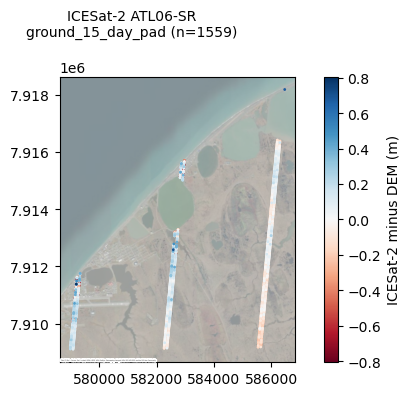

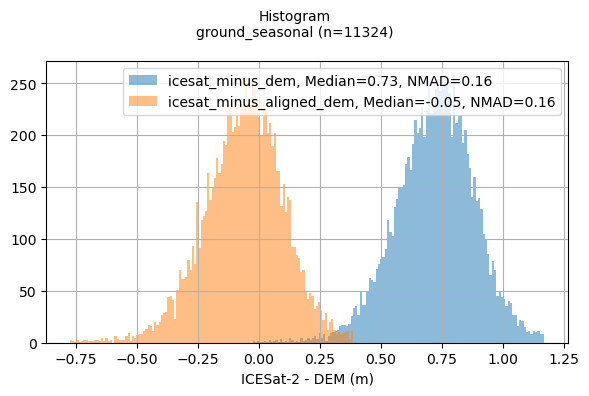

In [23]:
icesat.mapview_plot_atl06sr_to_dem(
    key="ground_15_day_pad",
    plot_aligned=True,
    **ctx_kwargs,
)

# Show a quick histogram
icesat.histogram(
    key="ground_seasonal",
    plot_aligned=True,
)

## WIP: Profile plots

In [24]:
# Collect only the coincident filtereded data again for profile plotting
# icesat.filter_atl06sr(
#     h_sigma_quantile=0.95,
#     mask_worldcover_water=True,
#     save_to_csv=False,
#     select_months=[4],
#     select_years=[2022],
# )

In [25]:
# icesat.plot_atl06sr(
#     title=f"Cleaned beam strengths (n={icesat.atl06sr_filtered.shape[0]})",
#     filtered=True,
#     plot_beams=True,
#     plot_dem=False,
#     map_crs=map_crs,
#     **ctx_kwargs
# )

# icesat.plot_atl06sr_dem_profiles(title="Profiles", only_strong_beams=True)